Aufgabe 1)
a)
w = Σ ai * yi * xi

b = yi - w * xi

Where ai is the Lagrange multiplier for the support vector xi, yi is the class label for xi, and xi is the feature vector for xi.

To calculate w and b using the given data, we need to consider both features xi1 and xi2 for each support vector xi. We can iterate through the list of support vectors and their corresponding Lagrange multipliers and class labels, and sum the products of the ai, yi, and xi values for both xi1 and xi2.

For example, using the given data, we can calculate w and b as follows:

w1 = (0.0437 * 1.00 * 3.50) + (0.2162 * 1.00 * 4.00) + (0.1427 * 1.00 * 4.50) + (0.3589 * -1.00 * 2.00) + (0.0437 * -1.00 * 2.50)
= 0.8328499999999999

w2 = (0.0437 * 1.00 * 4.25) + (0.2162 * 1.00 * 3.00) + (0.1427 * 1.00 * 1.75) + (0.3589 * -1.00 * 2.00) + (0.0437 * -1.00 * 0.50)
= 0.3444

b = (1/S) * Σ (yi - w * xi))
= ((1-(0.832849*3.50 + 0.3444*4.25))+(1-(0.832849*4.00 + 0.3444*3.00))+(1-(0.832849*4.50 + 0.3444*1.75))+(-1-(0.832849*2.00 + 0.3444*2.00))+(-1-(0.832849*2.50 + 0.3444*0.50)))/5
= -3.3405217
b)

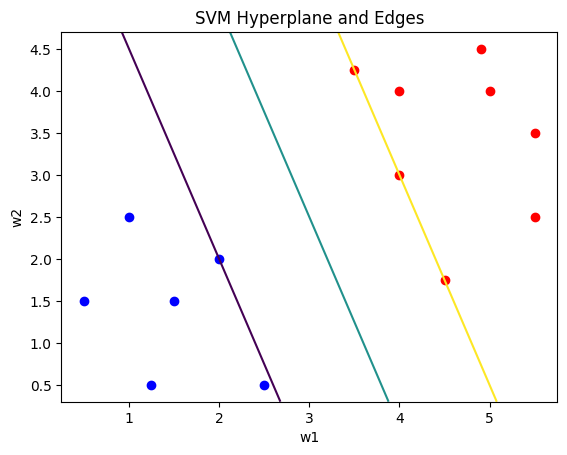

In [73]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data points
data = [    [3.50, 4.25, 1],
    [4.00, 3.00, 1],
    [4.00, 4.00, 1],
    [4.50, 1.75, 1],
    [4.90, 4.50, 1],
    [5.00, 4.00, 1],
    [5.50, 2.50, 1],
    [5.50, 3.50, 1],
    [0.50, 1.50, -1],
    [1.00, 2.50, -1],
    [1.25, 0.50, -1],
    [1.50, 1.50, -1],
    [2.00, 2.00, -1],
    [2.50, 0.50, -1]
]

# Weights and bias
w1 = 0.8328499999999999
w2 = 0.3444
b = -3.3405217

# Separate data points by class
class_1_points = []
class_minus_1_points = []
for point in data:
    if point[2] == 1:
        class_1_points.append(point[:2])
    else:
        class_minus_1_points.append(point[:2])

# Convert data points to numpy arrays for easier manipulation
class_1_points = np.array(class_1_points)
class_minus_1_points = np.array(class_minus_1_points)

# Plot data points and hyperplane
plt.scatter(class_1_points[:, 0], class_1_points[:, 1], color='r')
plt.scatter(class_minus_1_points[:, 0], class_minus_1_points[:, 1], color='b')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

df = pd.DataFrame(data)
X = df[[0, 1]].to_numpy()
y = df[2].to_numpy()
clf = SVC(C = 1, kernel = 'linear')
clf.fit(X,y)
x = np.linspace(xlim[0], xlim[1], 30)
y = np.linspace(ylim[0], ylim[1], 30)
Y, X = np.meshgrid(y, x)
X1, X2 = np.meshgrid(Y, X)
fvalues = np.vstack([X.ravel(), Y.ravel()]).T

F = clf.decision_function(fvalues).reshape(X.shape)

ax.contour(X, Y, F, levels=[-1, 0, 1])

# Add labels and show plot
plt.xlabel('w1')
plt.ylabel('w2')
plt.title('SVM Hyperplane and Edges')
plt.show()

c)
keine